### 정리
1. 공고를 올린 기업은 276 이며 총 공고는 733개
2. 평균 한 기업당 2.6개씩 올리며 제일 많이 올린 기업은 18개 이다. 
3. 10개이상 올린 기업은 8 기업이며 규모는 11-50 2개 50-100 3개 등 이다
4. 11-50규모 기업이 260개 올렸으며 501-1000 기업이 제일적은 12개 공고를 올렸다.
5. 8개 기업(101개)이 총공고의 약 13.8% 비율을 차지하고있다. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
회사정보 =pd.read_csv('./data/train_job/job_companies.csv')
잡키워드 = pd.read_csv('./data/train_job/job_tags.csv')
태그키워드 = pd.read_csv('./data/train_job/tags.csv')
train = pd.read_csv('./data/train_job/train.csv')
유저태그 = pd.read_csv('./data/train_job/user_tags.csv')

In [87]:
회사정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   companyID    733 non-null    object
 1   jobID        733 non-null    object
 2   companySize  643 non-null    object
dtypes: object(3)
memory usage: 17.3+ KB


In [89]:
회사정보.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [53]:
회사정보그룹 = 회사정보.groupby('companyID').count()
del 회사정보그룹['companySize']

In [60]:
회사정보그룹.head()

,jobID
companyID,
00411460f7c92d2124a67ea0f4cb5f85,4
006f52e9102a8d3be2fe5614f42ba989,2
05311655a15b75fab86956663e1819cd,3
06997f04a7db92466a2baa6ebc8b872d,7
069d3bb002acd8d7dd095917f9efe4cb,1


In [55]:
회사정보그룹.describe()

,jobID
count,276.000000
mean,2.655797
std,2.552931
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,18.000000


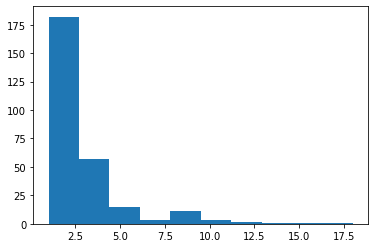

In [65]:
plt.hist(회사정보그룹['jobID'])
plt.show()

In [74]:
회사정보그룹탑8 = 회사정보그룹[회사정보그룹['jobID'] >= 10].sort_values(by = 'jobID', ascending =False)
회사정보사이즈 = 회사정보.copy()
del 회사정보사이즈['jobID']

In [82]:
pd.merge(회사정보그룹탑8,회사정보사이즈 , on='companyID' , how='left').drop_duplicates()

,companyID,jobID,companySize
0,b5dc4e5d9b495d0196f61d45b26ef33e,18,51-100
18,3b8a614226a953a8cd9526fca6fe9ba5,15,201-500
33,4f6ffe13a5d75b2d6a3923922b3922e5,14,11-50
47,c058f544c737782deacefa532d9add4c,12,101-200
59,eddea82ad2755b24c4e168c5fc2ebd40,12,11-50
71,3328bdf9a4b9504b9398284244fe97c2,10,1000 이상
81,cdc0d6e63aa8e41c89689f54970bb35f,10,51-100
91,d34ab169b70c9dcd35e62896010cd9ff,10,51-100


In [90]:
회사정보.groupby('companySize').count()

,companyID,jobID
companySize,,
1-10,100,100
1000 이상,13,13
101-200,60,60
11-50,260,260
201-500,56,56
501-1000,12,12
51-100,142,142
